In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import re, string
import emoji
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import regexp_tokenize, wordpunct_tokenize, blankline_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
Ba_reviews=pd.read_csv('./BA_reviews.csv')

In [3]:
Ba_reviews.head()

,Unnamed: 0,Title,Review,Rating,Date
0,0,"""premium price for very average service""",Not Verified | Regarding the aircraft and seat...,5,28th April 2023
1,1,"""lack of customer service""",Not Verified | I travelled with British Airway...,1,26th April 2023
2,2,"""Overall not a good airline""",Not Verified | Food was lousy. Who ever is pl...,2,24th April 2023
3,3,"""delayed and missed connecting flight""",✅ Trip Verified | Had the worst experience. Th...,1,24th April 2023
4,4,"""!not a good experience""",✅ Trip Verified | The ground staff were not h...,1,23rd April 2023


In [4]:
Ba_reviews.shape

(1990, 5)

In [5]:
Ba_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1990 non-null   int64 
 1   Title       1990 non-null   object
 2   Review      1990 non-null   object
 3   Rating      1990 non-null   int64 
 4   Date        1990 non-null   object
dtypes: int64(2), object(3)
memory usage: 77.9+ KB


***Data preprocessing***

In [6]:
Ba_reviews.Date

0        28th April 2023
1        26th April 2023
2        24th April 2023
3        24th April 2023
4        23rd April 2023
              ...       
1985    18th August 2016
1986    17th August 2016
1987    16th August 2016
1988    16th August 2016
1989    16th August 2016
Name: Date, Length: 1990, dtype: object

In [7]:
Ba_reviews['Date'] = Ba_reviews['Date'].str.replace('th', '')

In [8]:
Ba_reviews['Date'] = Ba_reviews['Date'].str.replace('rd', '')

In [9]:
Ba_reviews['Date'] = Ba_reviews['Date'].str.replace('nd', '')

In [10]:
Ba_reviews['Date'] = Ba_reviews['Date'].str.replace('st', '')

In [11]:
Ba_reviews['Date'] = Ba_reviews['Date'].str.replace('Augu', 'august')

In [12]:
def covert_monthName(s):
    dt = datetime.strptime(s, "%d %B %Y")
    return dt# datetime object generation   

In [13]:
Ba_reviews.Date=Ba_reviews.Date.apply(covert_monthName)

In [14]:
Ba_reviews.Date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1990 entries, 0 to 1989
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
1990 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.7 KB


In [15]:
Ba_reviews['Year'] = Ba_reviews['Date'].dt.year

In [16]:
Ba_reviews

,Unnamed: 0,Title,Review,Rating,Date,Year
0,0,"""premium price for very average service""",Not Verified | Regarding the aircraft and seat...,5,2023-04-28,2023
1,1,"""lack of customer service""",Not Verified | I travelled with British Airway...,1,2023-04-26,2023
2,2,"""Overall not a good airline""",Not Verified | Food was lousy. Who ever is pl...,2,2023-04-24,2023
3,3,"""delayed and missed connecting flight""",✅ Trip Verified | Had the worst experience. Th...,1,2023-04-24,2023
4,4,"""!not a good experience""",✅ Trip Verified | The ground staff were not h...,1,2023-04-23,2023
...,...,...,...,...,...,...
1985,1985,"""quick and hassle free""",Heathrow - Paris CDG return with British Airwa...,7,2016-08-18,2016
1986,1986,"""choice between a mini Kitkat or a mini mars bar""",✅ Verified Review | Abuja to London Heathrow....,3,2016-08-17,2016
1987,1987,"""hope this experience is not repeated""",✅ Verified Review | London Heathrow to Istanb...,5,2016-08-16,2016
1988,1988,"""flight time should justify at least a sandwich""",✅ Verified Review | The flight from London Hea...,7,2016-08-16,2016


<h1>Data cleaning and exploration <h1>

In [17]:
Ba_reviews.isna().sum()

Unnamed: 0    0
Title         0
Review        0
Rating        0
Date          0
Year          0
dtype: int64

In [18]:
Ba_reviews.duplicated().sum()

0

In [19]:
Ba_reviews.Review

0       Not Verified | Regarding the aircraft and seat...
1       Not Verified | I travelled with British Airway...
2       Not Verified |  Food was lousy. Who ever is pl...
3       ✅ Trip Verified | Had the worst experience. Th...
4       ✅ Trip Verified |  The ground staff were not h...
                              ...                        
1985    Heathrow - Paris CDG return with British Airwa...
1986    ✅ Verified Review |  Abuja to London Heathrow....
1987    ✅ Verified Review |  London Heathrow to Istanb...
1988    ✅ Verified Review | The flight from London Hea...
1989    ✅ Verified Review |  I was booked to travel Br...
Name: Review, Length: 1990, dtype: object

In [20]:
Ba_reviews['Review'] = Ba_reviews['Review'].str.replace('Not Verified', '')

In [21]:
Ba_reviews['Review'] = Ba_reviews['Review'].str.replace('Trip Verified', '')

In [22]:
Ba_reviews['Review'] = Ba_reviews['Review'].str.replace('Verified Review', '')

In [23]:
Ba_reviews['Review'] = Ba_reviews['Review'].str.replace('|', '')

/tmp/ipykernel_390659/221031651.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [24]:
Ba_reviews['Review'] = Ba_reviews['Review'].str.replace('✅', '')

In [25]:
Ba_reviews['Review'] = Ba_reviews['Review'].str.replace('-', '')

In [26]:
Ba_reviews.Review

0         Regarding the aircraft and seat: The busines...
1         I travelled with British Airways from Sweden...
2          Food was lousy. Who ever is planning the As...
3          Had the worst experience. The flight from L...
4           The ground staff were not helpful. Felt li...
                              ...                        
1985    Heathrow  Paris CDG return with British Airway...
1986        Abuja to London Heathrow. This flight took...
1987        London Heathrow to Istanbul return. The ou...
1988       The flight from London Heathrow to Krakow w...
1989        I was booked to travel British Airways fro...
Name: Review, Length: 1990, dtype: object

In [27]:
def pre_process(text):
    # Remove links
    text = re.sub('http://\S+|https://\S+', '', text)
    text = re.sub('http[s]?://\S+', '', text)
    text = re.sub(r"http\S+", "", text)


    text = re.sub(r'[^\w\s]', '', text)
    #text =re.sub(emoji.get_emoji_regexp(), r"", text)

    # Convert HTML references
    text = re.sub('&amp', 'and', text)
    text = re.sub('&lt', '<', text)
    text = re.sub('&gt', '>', text)
    #text = re.sub('\xao', ' ', text)

    # Remove new line characters
    text = re.sub('[\r\n]+', ' ', text)
    
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove multiple space characters
    text = re.sub('\s+',' ', text)
    
    # Convert to lowercase
    text = text.lower()
    return text

In [28]:
Ba_reviews['processed_Review'] = Ba_reviews['Review'].apply(pre_process)

In [29]:
Ba_reviews.Title=Ba_reviews['Title'].str.replace('"', '')

In [30]:
Ba_reviews

,Unnamed: 0,Title,Review,Rating,Date,Year,processed_Review
0,0,premium price for very average service,Regarding the aircraft and seat: The busines...,5,2023-04-28,2023,regarding the aircraft and seat the business ...
1,1,lack of customer service,I travelled with British Airways from Sweden...,1,2023-04-26,2023,i travelled with british airways from sweden ...
2,2,Overall not a good airline,Food was lousy. Who ever is planning the As...,2,2023-04-24,2023,food was lousy who ever is planning the asian...
3,3,delayed and missed connecting flight,Had the worst experience. The flight from L...,1,2023-04-24,2023,had the worst experience the flight from lond...
4,4,!not a good experience,The ground staff were not helpful. Felt li...,1,2023-04-23,2023,the ground staff were not helpful felt like a...
...,...,...,...,...,...,...,...
1985,1985,quick and hassle free,Heathrow Paris CDG return with British Airway...,7,2016-08-18,2016,heathrow paris cdg return with british airways...
1986,1986,choice between a mini Kitkat or a mini mars bar,Abuja to London Heathrow. This flight took...,3,2016-08-17,2016,abuja to london heathrow this flight took off...
1987,1987,hope this experience is not repeated,London Heathrow to Istanbul return. The ou...,5,2016-08-16,2016,london heathrow to istanbul return the outbou...
1988,1988,flight time should justify at least a sandwich,The flight from London Heathrow to Krakow w...,7,2016-08-16,2016,the flight from london heathrow to krakow wit...


In [31]:
Ba_reviews=Ba_reviews.drop(['Unnamed: 0', 'Review'], axis=1)

In [32]:
Ba_reviews.head()

,Title,Rating,Date,Year,processed_Review
0,premium price for very average service,5,2023-04-28,2023,regarding the aircraft and seat the business ...
1,lack of customer service,1,2023-04-26,2023,i travelled with british airways from sweden ...
2,Overall not a good airline,2,2023-04-24,2023,food was lousy who ever is planning the asian...
3,delayed and missed connecting flight,1,2023-04-24,2023,had the worst experience the flight from lond...
4,!not a good experience,1,2023-04-23,2023,the ground staff were not helpful felt like a...


In [33]:
Ba_reviews.Year.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1990 entries, 0 to 1989
Series name: Year
Non-Null Count  Dtype
--------------  -----
1990 non-null   int64
dtypes: int64(1)
memory usage: 15.7 KB


<AxesSubplot: >

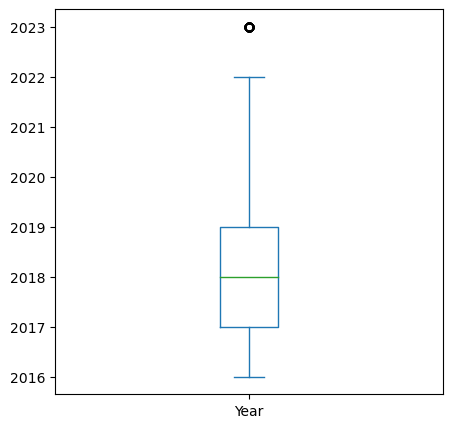

In [34]:
Ba_reviews.Year.plot(kind='box', figsize=(5,5))

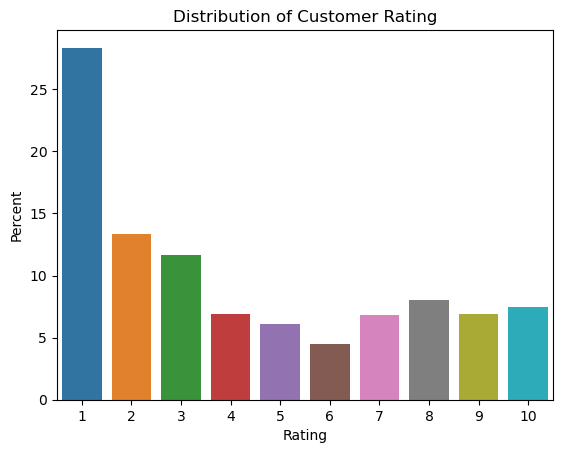

In [35]:
ax = sns.barplot(data=Ba_reviews, x='Rating', y='Rating', estimator=lambda x: len(x) / len(Ba_reviews) * 100)
ax.set(ylabel="Percent")
plt.title('Distribution of Customer Rating')
plt.show()

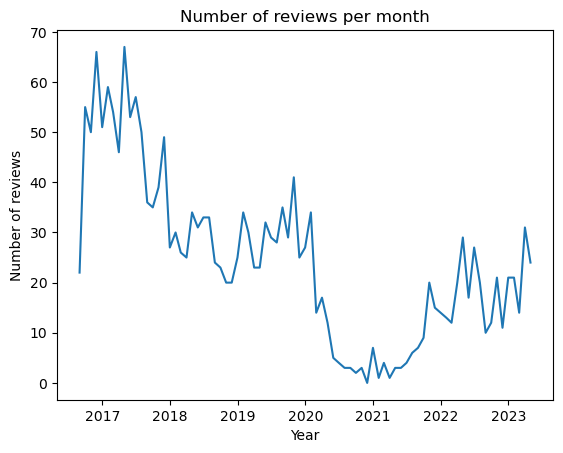

In [36]:
#Ba_reviews['Year'] = pd.to_datetime(Ba_reviews['Year'])
Ba_reviews = Ba_reviews.set_index('Date')
plt.plot(Ba_reviews['processed_Review'].resample('M').count())
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.title('Number of reviews per month')
plt.show()

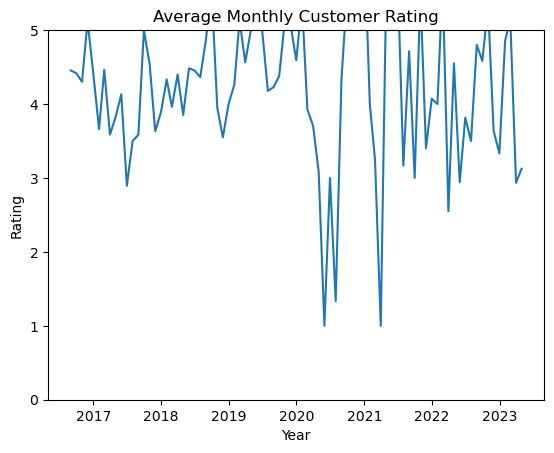

In [37]:
plt.plot(Ba_reviews['Rating'].resample('M').mean())
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average Monthly Customer Rating')
plt.ylim(0,5)
plt.show()

In [38]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/eyosi/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/eyosi/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/eyosi/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/eyosi/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/eyosi/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /home/eyosi/nltk_data

True

In [39]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [40]:
common_words = get_top_n_bigram(Ba_reviews['processed_Review'], 20)

df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])



In [41]:
df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar',
    yTitle='Count',
    linecolor='black',
    title='Top 20 bigrams in Reviews')

In [42]:
text_1 =Ba_reviews['processed_Review'].values

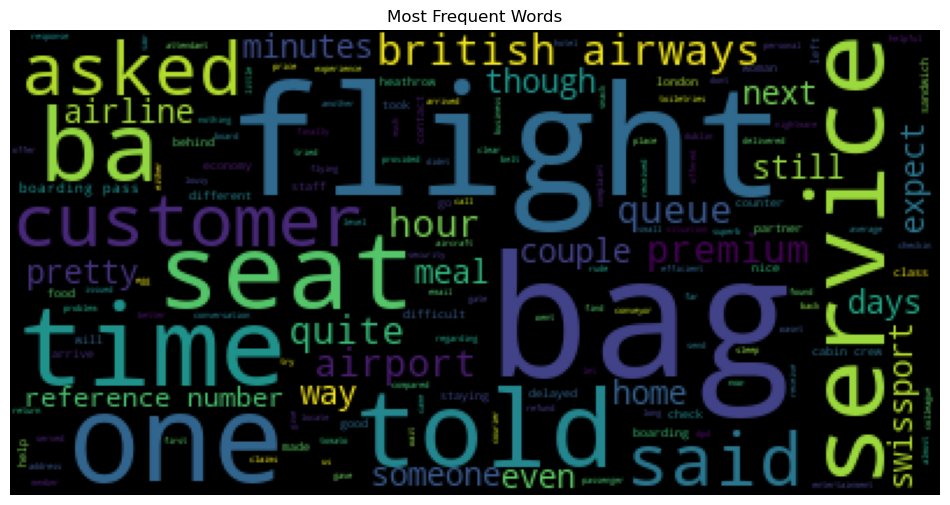

In [43]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(str(text_1))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(random_state=2017))
plt.title('Most Frequent Words')
plt.axis("off")
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/eyosi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


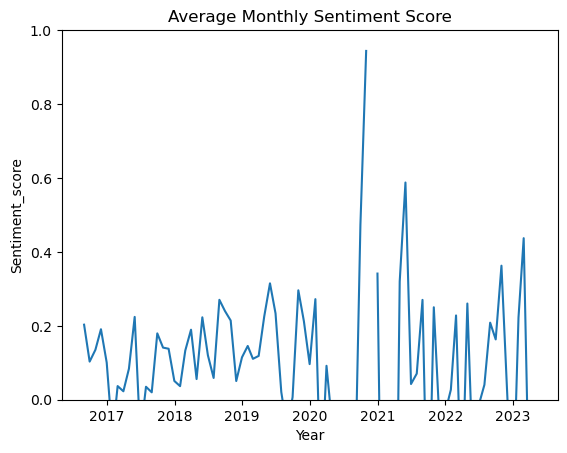

In [44]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores = Ba_reviews['processed_Review'].apply(sid.polarity_scores)
sentiment = sentiment_scores.apply(lambda x: x['compound'])
monthly_sentiment = sentiment.resample('M').mean()
plt.plot(monthly_sentiment)
plt.xlabel('Year')
plt.ylabel('Sentiment_score')
plt.title('Average Monthly Sentiment Score')
plt.ylim(0,1)
plt.show()

In [45]:
word_list = []
for line in text_1:
    word_list.append(pre_process(line))
word_list
from nltk.util import ngrams
from collections import Counter
def get_ngrams(txt, n):
    n_grams = ngrams(nltk.word_tokenize(txt),n)
    return [' '.join(grams) for grams in n_grams]
word_list_1 = str(word_list)
def remove_punctuations(word_list_1):
    words = nltk.word_tokenize(word_list_1)
    punt_removed = [w for w in words if w.lower() not in string.punctuation]
    return " ".join(punt_removed)
word_list_1=remove_punctuations(word_list_1)
bigrams = get_ngrams(word_list_1, 2)
bigrams_count = Counter(bigrams)
bigram_freq = pd.DataFrame.from_dict(bigrams_count, orient='index')
bigram_freq = bigram_freq.rename(columns={'index':'words', 0:'frequency'})
bigram_freq = bigram_freq.sort_values(by='frequency', ascending=False).head(20)
print(bigram_freq)

                 frequency
on the                1102
of the                1067
british airways       1048
the flight             971
in the                 940
to the                 887
i was                  855
and the                716
it was                 645
business class         611
to be                  600
for the                573
to london              559
i had                  554
at the                 552
we were                537
was a                  536
i have                 499
and i                  488
had to                 481


In [46]:
analyzer = SentimentIntensityAnalyzer()

In [47]:
Ba_reviews['polarity'] = Ba_reviews['processed_Review'].apply(lambda x: analyzer.polarity_scores(x))
Ba_reviews.head()

,Title,Rating,Year,processed_Review,polarity
Date,,,,,
2023-04-28,premium price for very average service,5,2023,regarding the aircraft and seat the business ...,"{'neg': 0.101, 'neu': 0.813, 'pos': 0.086, 'co..."
2023-04-26,lack of customer service,1,2023,i travelled with british airways from sweden ...,"{'neg': 0.061, 'neu': 0.905, 'pos': 0.034, 'co..."
2023-04-24,Overall not a good airline,2,2023,food was lousy who ever is planning the asian...,"{'neg': 0.11, 'neu': 0.842, 'pos': 0.049, 'com..."
2023-04-24,delayed and missed connecting flight,1,2023,had the worst experience the flight from lond...,"{'neg': 0.11, 'neu': 0.866, 'pos': 0.023, 'com..."
2023-04-23,!not a good experience,1,2023,the ground staff were not helpful felt like a...,"{'neg': 0.166, 'neu': 0.834, 'pos': 0.0, 'comp..."


In [48]:
Ba_reviews = pd.concat(
    [Ba_reviews.drop([ 'Title', 'polarity'], axis=1), 
     Ba_reviews['polarity'].apply(pd.Series)], axis=1)
Ba_reviews.head()

,Rating,Year,processed_Review,neg,neu,pos,compound
Date,,,,,,,
2023-04-28,5,2023,regarding the aircraft and seat the business ...,0.101,0.813,0.086,-0.4487
2023-04-26,1,2023,i travelled with british airways from sweden ...,0.061,0.905,0.034,-0.8692
2023-04-24,2,2023,food was lousy who ever is planning the asian...,0.110,0.842,0.049,-0.7476
2023-04-24,1,2023,had the worst experience the flight from lond...,0.110,0.866,0.023,-0.8604
2023-04-23,1,2023,the ground staff were not helpful felt like a...,0.166,0.834,0.000,-0.8537


In [49]:
Ba_reviews['sentiment'] = Ba_reviews['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
Ba_reviews.head()

,Rating,Year,processed_Review,neg,neu,pos,compound,sentiment
Date,,,,,,,,
2023-04-28,5,2023,regarding the aircraft and seat the business ...,0.101,0.813,0.086,-0.4487,negative
2023-04-26,1,2023,i travelled with british airways from sweden ...,0.061,0.905,0.034,-0.8692,negative
2023-04-24,2,2023,food was lousy who ever is planning the asian...,0.110,0.842,0.049,-0.7476,negative
2023-04-24,1,2023,had the worst experience the flight from lond...,0.110,0.866,0.023,-0.8604,negative
2023-04-23,1,2023,the ground staff were not helpful felt like a...,0.166,0.834,0.000,-0.8537,negative


In [50]:
# Tweet with highest positive sentiment
Ba_reviews.loc[Ba_reviews['compound'].idxmax()].values

array([9, 2018,
       ' london heathrow to dubai this was the first time i had flown in first class on ba i had read many reviews before travelling and they were somewhat mixed bas first class cabin is not even close to the best in the skies but then again it isnt the same price and reward tickets are readily available if you are a little bit flexible on dates we were on a 777 which is probably one of the oldest in the ba fleet the cabin was clean but a little bit tired in places but the seat was very comfortable and spacious the sleep suit and amenity kit were great with lots of little touches to make you more comfy it is nice they offer a male and female kit my wife was delighted with the contents the champagne that ba offer in first is superb i enjoyed a couple of glasses in the lounge and some on board and it is probably the best champagne i have tasted choice of other wines is good too and a particular treat is the johnnie walker blue label if you are a whiskey drinker food was v

In [51]:
# Tweet with highest negative sentiment 
# ...seems to be a case of wrong classification because of the word "deficit"
Ba_reviews.loc[Ba_reviews['compound'].idxmin()].values

array([[1, 2019,
        ' my flight was cancelled 3 days in a row was flying out on thursday and finally after days and hours of arguing with ba i got a flight out saturday night with swiss air they on the other hand actually fly and on time everything about the customer service customer relations has been terrible hours of waiting on the phone no answers on email my other flights with ba this year has been delayed too they have for two months promised to reimburse me on all my expenses and to pay the penalty fine of 700 first 10 days then 21 bank days and now we are way passed anything else that they have not transferred the money yet so far nothing and the complaint has been turned over to caa and the danish aviation authority',
        0.113, 0.815, 0.073, -0.7106, 'negative'],
       [2, 2019,
        ' hong kong to copenhagen via london the whole experience is a nightmare to me and my wife my wife lost her luggage ever since the first day of our journey on 1st august because our 

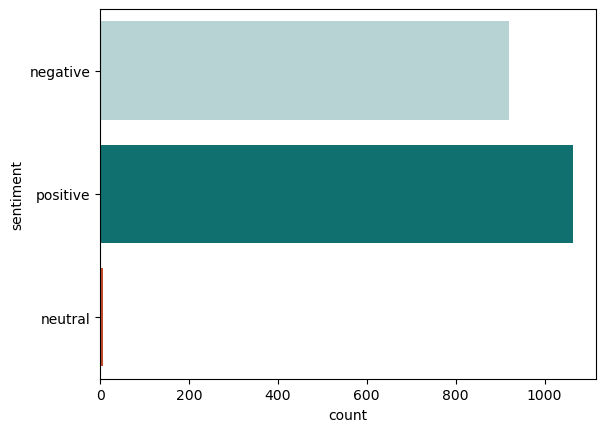

In [52]:
sns.countplot(y='sentiment', 
             data=Ba_reviews, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

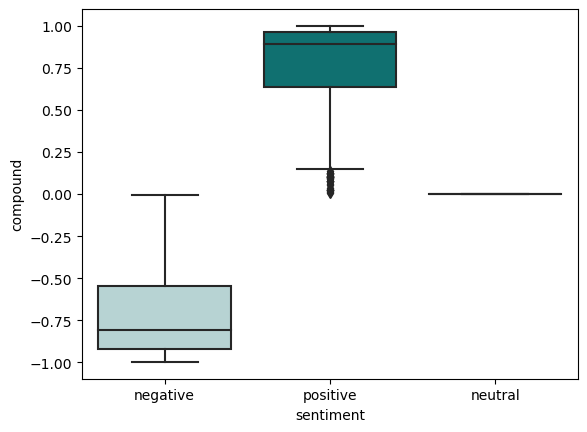

In [53]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=Ba_reviews);